<a href="https://colab.research.google.com/github/saadmarwan16/linear_regression_exercises/blob/main/all_greens_franchise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import files
# files.upload()

In [2]:
import numpy as np
from pandas import read_excel
import matplotlib.pyplot as plt

In [3]:
df = read_excel('mlr05.xls')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      27 non-null     float64
 1   X2      27 non-null     float64
 2   X3      27 non-null     int64  
 3   X4      27 non-null     float64
 4   X5      27 non-null     float64
 5   X6      27 non-null     int64  
dtypes: float64(4), int64(2)
memory usage: 1.4 KB


In [4]:
df.head()

,X1,X2,X3,X4,X5,X6
0,231.0,3.0,294,8.2,8.2,11
1,156.0,2.2,232,6.9,4.1,12
2,10.0,0.5,149,3.0,4.3,15
3,519.0,5.5,600,12.0,16.1,1
4,437.0,4.4,567,10.6,14.1,5


In [5]:
df.corr()

,X1,X2,X3,X4,X5,X6
X1,1.000000,0.894092,0.945504,0.914024,0.953683,-0.912236
X2,0.894092,1.000000,0.843616,0.748587,0.838023,-0.765738
X3,0.945504,0.843616,1.000000,0.906231,0.863917,-0.807380
X4,0.914024,0.748587,0.906231,1.000000,0.795434,-0.841280
X5,0.953683,0.838023,0.863917,0.795434,1.000000,-0.869590
X6,-0.912236,-0.765738,-0.807380,-0.841280,-0.869590,1.000000


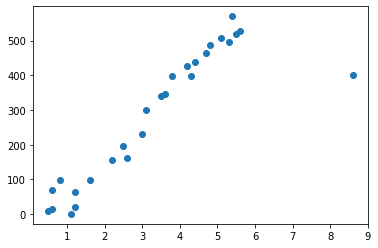

In [6]:
plt.scatter(df['X2'], df['X1']);

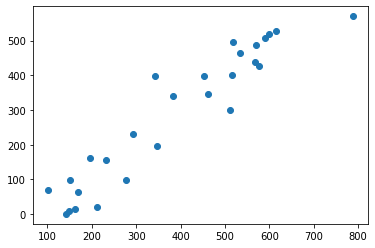

In [7]:
plt.scatter(df['X3'], df['X1']);

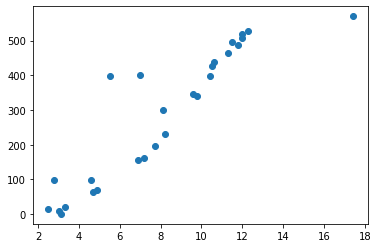

In [8]:
plt.scatter(df['X4'], df['X1']);

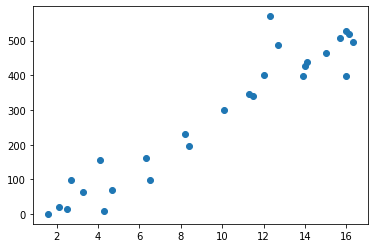

In [9]:
plt.scatter(df['X5'], df['X1']);

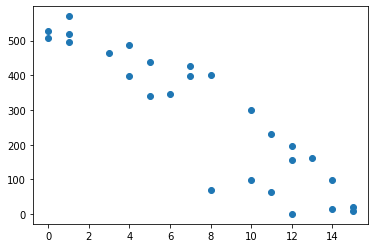

In [10]:
plt.scatter(df['X6'], df['X1']);

In [11]:
X1 = df['X2']
X2 = df['X3']
X3 = df['X4']
X4 = df['X5']
X5 = df['X6']
X = df[['X2', 'X3', 'X4', 'X5', 'X6']]
Y = df['X1']

In [12]:
def fit(X, Y):
    denominator = X.dot(X) - X.mean() * X.sum()
    a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
    b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

    return a*X + b

In [13]:
Y1_hat = fit(X1, Y)
Y2_hat = fit(X2, Y)
Y3_hat = fit(X3, Y)
Y4_hat = fit(X4, Y)
Y5_hat = fit(X5, Y)

In [14]:
def get_r2(Y, Yhat):
    d1 = Y - Yhat
    d2 = Y - Y.mean()

    return 1 - d1.dot(d1) / d2.dot(d2)

In [15]:
print(f"The r_squared value of X1 is: {get_r2(Y, Y1_hat)}")
print(f"The r_squared value of X2 is: {get_r2(Y, Y2_hat)}")
print(f"The r_squared value of X3 is: {get_r2(Y, Y3_hat)}")
print(f"The r_squared value of X4 is: {get_r2(Y, Y4_hat)}")
print(f"The r_squared value of X5 is: {get_r2(Y, Y5_hat)}")

The r_squared value of X1 is: 0.7994006489576572
The r_squared value of X2 is: 0.8939771057885375
The r_squared value of X3 is: 0.8354400089485228
The r_squared value of X4 is: 0.9095113796061699
The r_squared value of X5 is: 0.83217523508888


In [16]:
N = X.shape[0]
ones = np.array([np.ones(N)])
Xb = np.concatenate((ones.T, X), axis=1)

In [17]:
def fit_multi(Xb, Y):
    return np.linalg.solve(Xb.T.dot(Xb), Xb.T.dot(Y))

In [18]:
w = fit_multi(Xb, Y)
w

array([-18.85941416,  16.20157356,   0.17463515,  11.52626903,
        13.5803129 ,  -5.31097141])

In [19]:
def get_multi_r2(Xb, Y, w):
    Y_hat = Xb.dot(w)
    d1 = Y - Y_hat
    d2 = Y - Y.mean()

    return 1 - d1.dot(d1) / d2.dot(d2)

In [20]:
print(f"The overall r_squared value is: {get_multi_r2(Xb, Y, w)}")

The overall r_squared value is: 0.9931794970765471
